## Predicting Length-of-Stay of Inpatient at Hospitals
* Background: The Statewide Planning and Research Cooperative System (SPARCS) inpatient de-identified dataset contains discharge level detail on patient characteristics, diagnoses, treatments, services, and charges in 2015.
* Goal: Predict the length of stay of a patient upon admission. To help healthcare providers reduce cost savings, prioritize hospital capacity and avoid adverse patient events (e.g.HACs). 
* Author: Rainie Gu. Feel free to contact if you have any questions at guyurun@gmail.com


<a id='hyperlink'></a>
####  Navigating Question List 

I've created hyperlinks to cells that answers the questions in instruction. You can click the link as a table of contents that you want to link to. And you can also read the notebook by following the order of my thinking process.

* Concepts
    * [Which ML model would you use to tackle that problem](#1) 
    * [Which assumptions do you have to make given the available data?](#2)
    * [Which feature(s) have more predictive power for the given task? Why?](#3)
* Applications
    * [What is your model’s performance?](#4)
    * [For which cases does your model perform poorly? Why?](#5)
    * [If you had more time to work on this, how would you increase your current performance by 10%? Please explain.](#6)
    
* Questions
    * [Propose 2 additional questions that might be answered using this dataset. How you would answer these questions? Elaborate.](#7)

In [1]:
import warnings
warnings.simplefilter('ignore')
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',200)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv')
df.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.000,37.000,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Urgent,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,2,Moderate,Minor,Medical,Medicare,Private Health Insurance,NaN,90335341.000,nan,nan,0,N,Y,5333.900,4818.420
1,Western NY,Allegany,226700.000,37.000,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Elective,Hosp Basd Medicare Approved Swing Bed,2015,55,Fluid and electrolyte disorders,0,NO PROC,422,Hypovolemia & related electrolyte disorders,10,"Endocrine, Nutritional and Metabolic Diseases ...",2,Moderate,Moderate,Medical,Medicare,NaN,NaN,90335341.000,nan,nan,0,N,Y,4865.990,4588.780
2,Western NY,Allegany,226700.000,37.000,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Urgent,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis ...,202,ELECTROCARDIOGRAM,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Medicare,Private Health Insurance,NaN,90335341.000,167816.000,nan,0,N,Y,5901.540,5559.560
3,Western NY,Allegany,226700.000,37.000,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,2,Elective,Home or Self Care,2015,55,Fluid and electrolyte disorders,0,NO PROC,249,"Other gastroenteritis, nausa & vomiting",6,Diseases and Disorders of the Digestive System,2,Moderate,Minor,Medical,Medicare,NaN,NaN,90335341.000,nan,nan,0,N,Y,3619.080,3567.250
4,Western NY,Allegany,226700.000,37.000,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,2,Elective,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Private Health Insurance,90335341.000,nan,nan,0,N,Y,3185.870,3167.890


### Data Processing

In [4]:
df.columns = df.columns.str.replace('-', '')
df.columns = df.columns.str.replace(' ', '_')

In [5]:
df.shape

(2346931, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346931 entries, 0 to 2346930
Data columns (total 37 columns):
Health_Service_Area                    object
Hospital_County                        object
Operating_Certificate_Number           float64
Facility_Id                            float64
Facility_Name                          object
Age_Group                              object
Zip_Code__3_digits                     object
Gender                                 object
Race                                   object
Ethnicity                              object
Length_of_Stay                         object
Type_of_Admission                      object
Patient_Disposition                    object
Discharge_Year                         int64
CCS_Diagnosis_Code                     int64
CCS_Diagnosis_Description              object
CCS_Procedure_Code                     int64
CCS_Procedure_Description              object
APR_DRG_Code                           int64
APR_DRG_Descrip

In [7]:
# how much of data is missing?
(df.isnull().sum()/len(df))*100

Health_Service_Area                    0.124
Hospital_County                        0.124
Operating_Certificate_Number           0.124
Facility_Id                            0.124
Facility_Name                          0.000
Age_Group                              0.000
Zip_Code__3_digits                     0.188
Gender                                 0.000
Race                                   0.000
Ethnicity                              0.000
Length_of_Stay                         0.000
Type_of_Admission                      0.000
Patient_Disposition                    0.000
Discharge_Year                         0.000
CCS_Diagnosis_Code                     0.000
CCS_Diagnosis_Description              0.000
CCS_Procedure_Code                     0.000
CCS_Procedure_Description              0.000
APR_DRG_Code                           0.000
APR_DRG_Description                    0.000
APR_MDC_Code                           0.000
APR_MDC_Description                    0.000
APR_Severi

* We need do some missing inputation later. For variables , we won't be using as feautures such as the Other Provider License Number ,due to large size of missing.
* birth weight some should be missing but not missing. We need to investigate. 
* Payment Typology 3 need feature engineering.

In [8]:
# check unique values
for name in df.columns:
    print('{0:40s} \t {1:5d}'.format(name, len(df[name].unique())))

Health_Service_Area                      	     9
Hospital_County                          	    58
Operating_Certificate_Number             	   180
Facility_Id                              	   214
Facility_Name                            	   214
Age_Group                                	     5
Zip_Code__3_digits                       	    51
Gender                                   	     3
Race                                     	     4
Ethnicity                                	     4
Length_of_Stay                           	   221
Type_of_Admission                        	     6
Patient_Disposition                      	    19
Discharge_Year                           	     1
CCS_Diagnosis_Code                       	   263
CCS_Diagnosis_Description                	   263
CCS_Procedure_Code                       	   232
CCS_Procedure_Description                	   232
APR_DRG_Code                             	   316
APR_DRG_Description                      	   316
APR_MDC_Code        

Many high cardnality features that need feature engineering. Also, we can just remove the rows that are missing abortion indicator (only 2) and ER indicator (only 2) 

In [9]:
# Classify the features into categorical and numerical fearures
numcols= ['Length_of_Stay','Birth_Weight','Total_Charges', 'Total_Costs']
catcols = [x for x in df.columns if x not in numcols]

In [10]:
for x in catcols : 
    df[x]=df[x].astype('category')

In [11]:
# change 120 + to numeric
df.Length_of_Stay.replace('120 +', '120',inplace=True)

In [12]:
df[['Length_of_Stay','Birth_Weight','Total_Charges', 'Total_Costs','CCS_Diagnosis_Code','CCS_Procedure_Code']] = df[['Length_of_Stay','Birth_Weight','Total_Charges', 'Total_Costs','CCS_Diagnosis_Code','CCS_Procedure_Code']].apply(pd.to_numeric)

In [13]:
df.describe()

,Length_of_Stay,CCS_Diagnosis_Code,CCS_Procedure_Code,Birth_Weight,Total_Charges,Total_Costs
count,2346931.000,2346931.000,2346931.000,2346931.000,2346931.000,2346931.000
mean,5.476,190.562,112.763,326.564,43214.810,14732.539
std,8.034,159.636,88.930,1000.335,80460.086,28198.900
min,1.000,1.000,0.000,0.000,0.010,0.000
25%,2.000,106.000,0.000,0.000,12028.615,4410.150
50%,3.000,159.000,132.000,0.000,23486.370,8191.270
75%,6.000,218.000,216.000,0.000,46616.700,15771.820
max,120.000,917.000,999.000,9900.000,7248390.820,3007712.730


### Exploratory Analysis

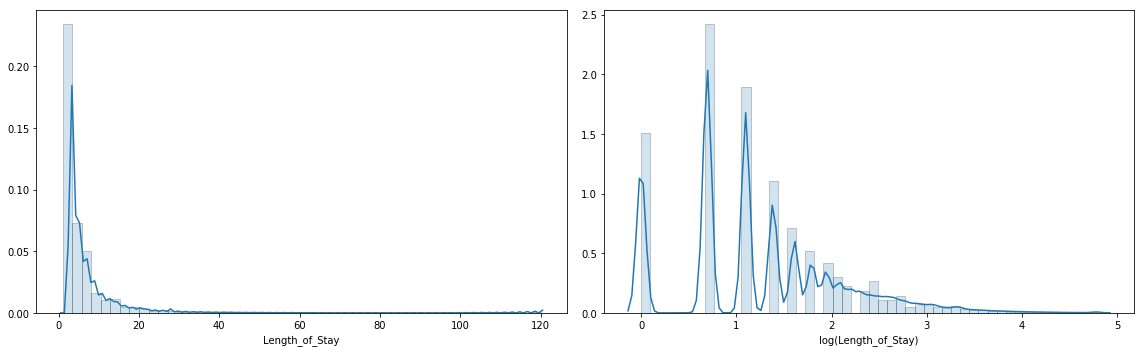

In [14]:
# Distribution of length of stay (LOS)
warnings.filterwarnings('ignore')
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
sns.distplot(df['Length_of_Stay'], ax=ax[0], hist_kws=hist_kws)
sns.distplot(np.log(df['Length_of_Stay']), ax=ax[1], hist_kws=hist_kws)
ax[1].set_xlabel('log(Length_of_Stay)')
plt.tight_layout()
plt.show()

In [15]:
df.Length_of_Stay.quantile([.9,0.995,.999])

0.900    11.000
0.995    53.000
0.999   109.000
Name: Length_of_Stay, dtype: float64

The Length of stay has a very skewed distribution. Most of the cases(99.5% percentile are under 53 days and apparently there some extreme values that we need to take care of

In [16]:
df['outliers'] = 0
df.loc[df['Length_of_Stay'] >53, 'outliers'] = 1 
df['outliers'].value_counts()

0    2335611
1      11320
Name: outliers, dtype: int64

About 4% of the data are treated as outliers now

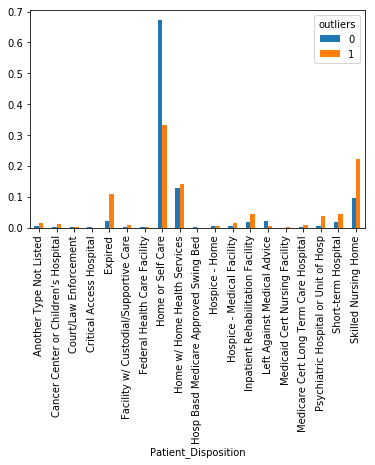

In [17]:
a=df.groupby('outliers')['Patient_Disposition'].value_counts(normalize=True).unstack()
a.T.plot(kind='bar')

In [18]:
a=df.groupby('outliers')['CCS_Diagnosis_Description'].value_counts(normalize=True).unstack()
a=a.T

In [19]:
a['diff']=a.iloc[:,1]-a.iloc[:,0]
a.sort_values(by='diff',ascending=False,inplace=True)
a.head()

outliers,0,1,diff
CCS_Diagnosis_Description,,,
Schizophrenia and other psychotic disorders,0.018,0.186,0.169
Septicemia (except in labor),0.046,0.090,0.044
Mood disorders,0.024,0.061,0.037
Liveborn,0.097,0.133,0.036
Respiratory failure; insufficiency; arrest (adult),0.008,0.037,0.029


Seems that the top reason of most of the extreme value of LOS is Schizophrenia and other psychotic disorders, which is not surprising.

In [20]:
# most frequent Diagnosis
df['CCS_Diagnosis_Description'].value_counts(normalize=True).sort_values(ascending=False).to_frame().head()

,CCS_Diagnosis_Description
Liveborn,0.097
Septicemia (except in labor),0.046
Osteoarthritis,0.027
Congestive heart failure; nonhypertensive,0.025
Mood disorders,0.024


In [21]:
df['CCS_Procedure_Description'].value_counts(normalize=True).sort_values(ascending=False).to_frame().head(10)

,CCS_Procedure_Description
NO PROC,0.260
OTHER THERAPEUTIC PRCS,0.075
OT PRCS TO ASSIST DELIV,0.036
PROPHYLACTIC VAC/INOCUL,0.035
CESAREAN SECTION,0.032
RESP INTUB/MECH VENTIL,0.032
ALCO/DRUG REHAB/DETOX,0.025
PSYCHO/PSYCHI EVAL/THER,0.023
CIRCUMCISION,0.020
OPHTHALM-/OT-OLOGIC DX,0.017


In [22]:
# why 26% of the inpatients have no procedure ?
df[df.CCS_Procedure_Description =='NO PROC'].CCS_Diagnosis_Description.value_counts(normalize=True).sort_values(ascending=False).to_frame().head(10)

,CCS_Diagnosis_Description
Liveborn,0.070
Septicemia (except in labor),0.053
Mood disorders,0.051
Congestive heart failure; nonhypertensive,0.039
Pneumonia (except that caused by tuberculosis or sexually transmitted disease),0.038
Schizophrenia and other psychotic disorders,0.030
Chronic obstructive pulmonary disease and bronchiectasis,0.029
Cardiac dysrhythmias,0.026
Skin and subcutaneous tissue infections,0.026
Urinary tract infections,0.025


In [23]:
# would LOS differs by providers? extract top 10 facilities
facility= df.groupby('Facility_Name')['Length_of_Stay'].agg({'avg':'mean','cnt': 'count'}).sort_values(by='cnt',ascending=False)
facility=facility.head(10)
facility['top_facility_ind']=1
facility = facility.drop(['avg','cnt'], axis=1)
facility

,top_facility_ind
Facility_Name,
Mount Sinai Hospital,1
North Shore University Hospital,1
New York Presbyterian Hospital - Columbia Presbyterian Center,1
New York Presbyterian Hospital - New York Weill Cornell Center,1
Montefiore Medical Center - Henry & Lucy Moses Div,1
Maimonides Medical Center,1
Long Island Jewish Medical Center,1
NewYork-Presbyterian Brooklyn Methodist Hospital,1
Strong Memorial Hospital,1


In [24]:
df = pd.merge(left=df,right=facility,how='left',on='Facility_Name')

In [25]:
df.fillna({'top_facility_ind':0}, inplace=True)

### Feature Engineering

Most of the inpatients events that have no procedure are related to liveborn and mental disease. Thus, I also wanted to create a binary feature of observational status as their LOS may be signficantly different.

In [26]:
df['observational_status']=0
df.loc[df['CCS_Procedure_Description']=='NO PROC','observational_status']=1
df['observational_status'].value_counts()

0    1736678
1     610253
Name: observational_status, dtype: int64

In [27]:
df.groupby('observational_status')['Length_of_Stay'].mean()

observational_status
0   5.801
1   4.552
Name: Length_of_Stay, dtype: float64

In [28]:
df['APR_DRG_Description'].value_counts(normalize=True).sort_values(ascending=False).to_frame().head(10)

,APR_DRG_Description
"Neonate birthwt >2499g, normal newborn or neonate w other problem",0.084
Vaginal delivery,0.063
Septicemia & disseminated infections,0.041
Cesarean delivery,0.032
Heart failure,0.024
Other pneumonia,0.018
Chronic obstructive pulmonary disease,0.017
Knee joint replacement,0.016
Schizophrenia,0.015
Cellulitis & other skin infections,0.015


In [29]:
df.Ethnicity.value_counts()

Not Span/Hispanic    1954846
Spanish/Hispanic      278838
Unknown               104532
Multi-ethnic            8715
Name: Ethnicity, dtype: int64

In [30]:
df['Race'].value_counts() 

White                     1334890
Other Race                 544720
Black/African American     444883
Multi-racial                22438
Name: Race, dtype: int64

In [31]:
# Recode 2 ethnicity related features into one 
def ethnicity_combine(row):
    if row['Ethnicity'] == 'Spanish/Hispanic':
        return 'Hispanic'
    else:
        return row['Race']
        

df['ethnicity_combine'] = df[['Race', 'Ethnicity']].apply(ethnicity_combine, axis = 1)
        
# df['ethnicity_combine'].value_counts()

In [32]:
df['ethnicity_combine'].value_counts()

White                     1263168
Black/African American     422186
Other Race                 362376
Hispanic                   278838
Multi-racial                20363
Name: ethnicity_combine, dtype: int64

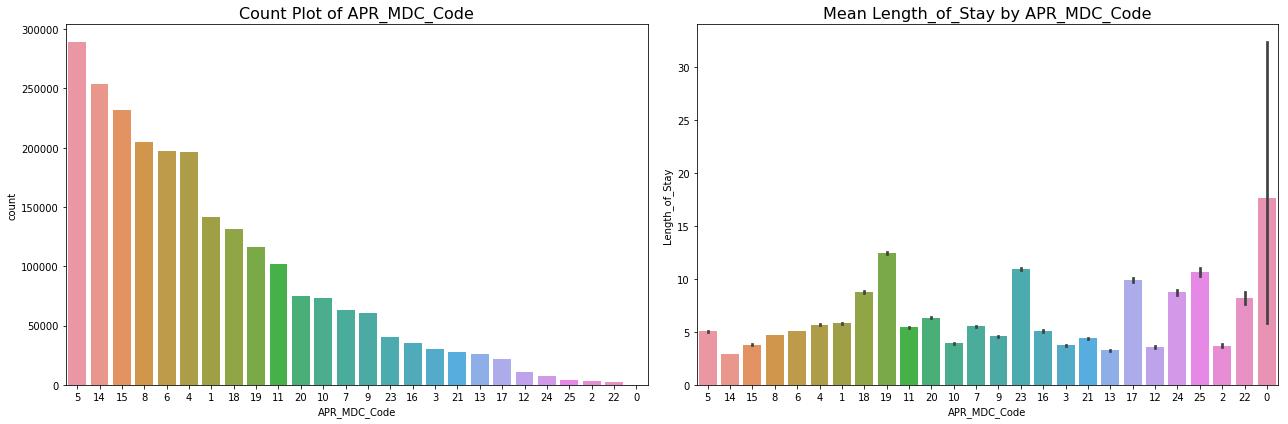

In [33]:
# Visualization of MDC groups
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='APR_MDC_Code', data=df, ax=ax[0],order = df['APR_MDC_Code'].value_counts().index)
ax[0].set_title('Count Plot of APR_MDC_Code', fontsize=16)

sns.barplot(x='APR_MDC_Code', y='Length_of_Stay', data=df, ax=ax[1],order = df['APR_MDC_Code'].value_counts().index)
ax[1].set_title('Mean Length_of_Stay by APR_MDC_Code', fontsize=16)
plt.tight_layout()
plt.show()

<a id='2'></a>
*which assumptions do you have to make given the available data?* 

Assuming the dataset is representative (e.g. reflecting general inpatient population in NY state) and consistent across the year of 2015 (e.g. no missing month records). Among fields, my assumptions are the features are available by the time when patients start their inpatient events. And this is also why I had to remove fields such as patient dispositions from the list.  For feature usage, as there're many codes of disease and procedure related codes that have high cardinality in the dataset. I used some techniques such as grouping by using public data to replace them, assuming current medical codes grouping method is used by the industry. For examples, accord to research, the APR State DRG and MDC fields are dependent. The DRG codes are determined by multiple level of Diagnosis category. 
https://www.health.ny.gov/statistics/sparcs/sysdoc/appy.htm
https://www.forwardhealth.wi.gov/kw/pdf/handouts/3M_APR_DRG_Presentation.pdf. Thus, we are using MDC code only for now. Then, let's look at the Diagnosis code and Procedure code.

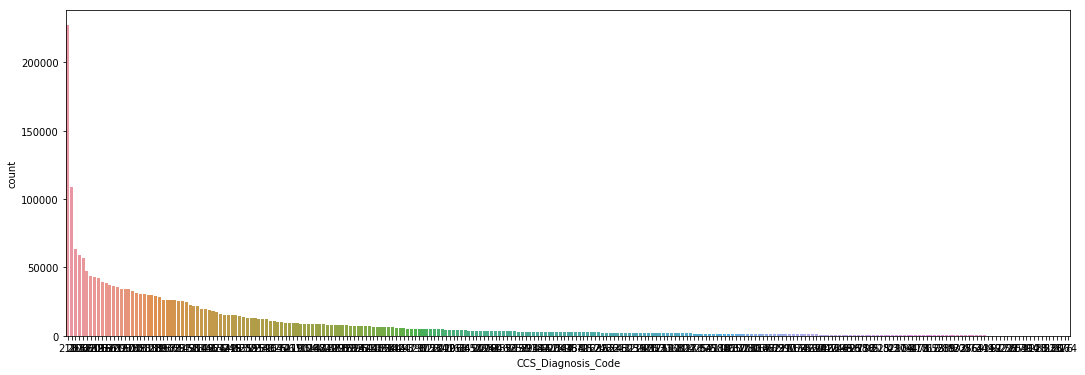

In [34]:
fig = plt.subplots(figsize=(18, 6))
sns.countplot(x='CCS_Diagnosis_Code', data=df,order = df['CCS_Diagnosis_Code'].value_counts().index)

The above plots shows a long-tail distribution with extremely granular classes as categorical feature, so this means we need to apply some higher level grouping to use the feature in model.

After some internet research, I was able to find that there is a higher level of category type on both Procedure code and Diagnosis from CSS (Clinical Classifications Software). Here's where I downloaded the relationship of codes.  
https://www.hcup-us.ahrq.gov/toolssoftware/ccs/CCSCategoryNames_FullLabels.pdf

In [35]:
#df=df.drop(['CCS_Diagnosis_Group_x','CCS_Procedure_Group_x','CCS_Diagnosis_Group_y','CCS_Procedure_Group_y'], axis=1)

In [36]:
Diagnosis= pd.read_csv('CCSCategoryNames_FullLabels_Diagnosis.csv')
Procedure= pd.read_csv('CCSCategoryNames_FullLabels_Procedure.csv')

In [37]:
Diagnosis.head()

,CCS_Diagnosis_Code,CCS_Diagnosis_Group,CCS_Diagnosis_Full_Description
0,1,1,1.1.1 Tuberculosis [1]
1,2,1,1.1.2 Septicemia (except in labor) [2]
2,9,1,1.1.3 Sexually transmitted infections (not HIV...
3,3,1,1.1.4 Other bacterial infections [3]
4,4,1,1.2 Mycoses [4]


In [38]:
Procedure.head()

,CCS_Procedure_Code,CCS_Procedure_Group,CCS_Procedure_Full_Description
0,1,1,1.1 Incision and excision of CNS [1]
1,2,1,1.2 Insertion; replacement; or removal of extr...
2,3,1,1.3 Laminectomy; excision intervertebral disc [3]
3,4,1,1.4 Diagnostic spinal tap [4]
4,5,1,1.5 Insertion of catheter or spinal stimulator...


In [39]:
Diagnosis=Diagnosis.drop(['CCS_Diagnosis_Full_Description'], axis=1)
Procedure=Procedure.drop(['CCS_Procedure_Full_Description'], axis=1)

In [40]:
Diagnosis['CCS_Diagnosis_Code'] = pd.to_numeric(Diagnosis['CCS_Diagnosis_Code'], errors='coerce')
Procedure['CCS_Procedure_Code'] = pd.to_numeric(Procedure['CCS_Procedure_Code'], errors='coerce')

In [41]:
df=pd.merge(left=df,right=Diagnosis,how='left',on='CCS_Diagnosis_Code')
df=pd.merge(left=df,right=Procedure,how='left',on='CCS_Procedure_Code')

In [42]:
df.fillna({'CCS_Diagnosis_Group':0, 'CCS_Procedure_Group':0}, inplace=True)

In [43]:
df[['CCS_Diagnosis_Group','CCS_Procedure_Group']]=df[['CCS_Diagnosis_Group','CCS_Procedure_Group']].astype('category')

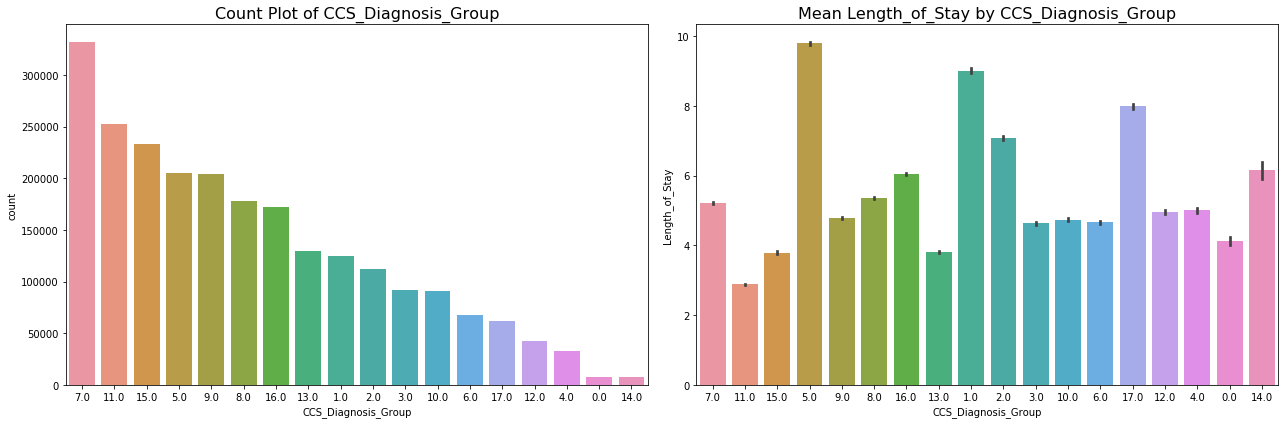

In [44]:
# Visualization of different groups
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='CCS_Diagnosis_Group', data=df, ax=ax[0],order = df['CCS_Diagnosis_Group'].value_counts().index)
ax[0].set_title('Count Plot of CCS_Diagnosis_Group', fontsize=16)

sns.barplot(x='CCS_Diagnosis_Group', y='Length_of_Stay', data=df, ax=ax[1],order = df['CCS_Diagnosis_Group'].value_counts().index)
ax[1].set_title('Mean Length_of_Stay by CCS_Diagnosis_Group', fontsize=16)
plt.tight_layout()
plt.show()

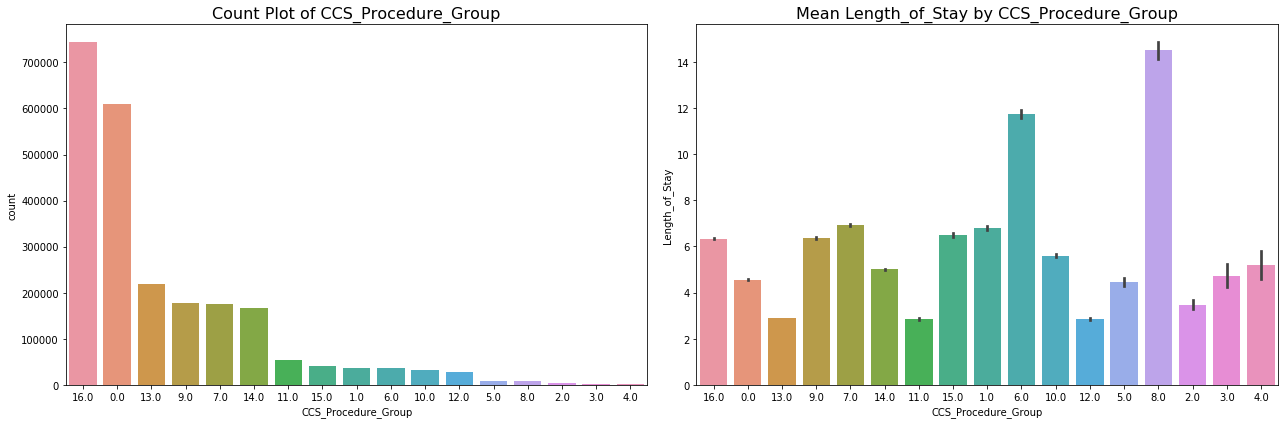

In [45]:
# Visualization of different Procedure groups
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='CCS_Procedure_Group', data=df, ax=ax[0],order = df['CCS_Procedure_Group'].value_counts().index)
ax[0].set_title('Count Plot of CCS_Procedure_Group', fontsize=16)

sns.barplot(x='CCS_Procedure_Group', y='Length_of_Stay', data=df, ax=ax[1],order = df['CCS_Procedure_Group'].value_counts().index)
ax[1].set_title('Mean Length_of_Stay by CCS_Procedure_Group', fontsize=16)
plt.tight_layout()
plt.show()

* For diagnosis, diseases of the circulatory system and complications of pregnancy are the top diagnosis group for inpatients.Although Mental illness (group number 5) is not the most frequent group, it has longest LOS.
* For procedures, Miscellaneous diagnostic and therapeutic procedures(group number 16) is the top frequent procedure group. However, the longest LOS procedure group is Operations on the hemic and lymphatic system (group number 8), even though the occurance is small.
* Seems that all groupings are as expected , which means we can replace group level by code level as model's input features.

In [46]:
df.head()

,Health_Service_Area,Hospital_County,Operating_Certificate_Number,Facility_Id,Facility_Name,Age_Group,Zip_Code__3_digits,Gender,Race,Ethnicity,Length_of_Stay,Type_of_Admission,Patient_Disposition,Discharge_Year,CCS_Diagnosis_Code,CCS_Diagnosis_Description,CCS_Procedure_Code,CCS_Procedure_Description,APR_DRG_Code,APR_DRG_Description,APR_MDC_Code,APR_MDC_Description,APR_Severity_of_Illness_Code,APR_Severity_of_Illness_Description,APR_Risk_of_Mortality,APR_Medical_Surgical_Description,Payment_Typology_1,Payment_Typology_2,Payment_Typology_3,Attending_Provider_License_Number,Operating_Provider_License_Number,Other_Provider_License_Number,Birth_Weight,Abortion_Edit_Indicator,Emergency_Department_Indicator,Total_Charges,Total_Costs,outliers,top_facility_ind,observational_status,ethnicity_combine,CCS_Diagnosis_Group,CCS_Procedure_Group
0,Western NY,Allegany,226700.000,37.000,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Urgent,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,2,Moderate,Minor,Medical,Medicare,Private Health Insurance,NaN,90335341.000,nan,nan,0,N,Y,5333.900,4818.420,0,0.000,1,White,8.000,0.000
1,Western NY,Allegany,226700.000,37.000,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Elective,Hosp Basd Medicare Approved Swing Bed,2015,55,Fluid and electrolyte disorders,0,NO PROC,422,Hypovolemia & related electrolyte disorders,10,"Endocrine, Nutritional and Metabolic Diseases ...",2,Moderate,Moderate,Medical,Medicare,NaN,NaN,90335341.000,nan,nan,0,N,Y,4865.990,4588.780,0,0.000,1,White,3.000,0.000
2,Western NY,Allegany,226700.000,37.000,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Urgent,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis ...,202,ELECTROCARDIOGRAM,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Medicare,Private Health Insurance,NaN,90335341.000,167816.000,nan,0,N,Y,5901.540,5559.560,0,0.000,0,White,8.000,16.000
3,Western NY,Allegany,226700.000,37.000,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,2,Elective,Home or Self Care,2015,55,Fluid and electrolyte disorders,0,NO PROC,249,"Other gastroenteritis, nausa & vomiting",6,Diseases and Disorders of the Digestive System,2,Moderate,Minor,Medical,Medicare,NaN,NaN,90335341.000,nan,nan,0,N,Y,3619.080,3567.250,0,0.000,1,White,3.000,0.000
4,Western NY,Allegany,226700.000,37.000,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,2,Elective,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Private Health Insurance,90335341.000,nan,nan,0,N,Y,3185.870,3167.890,0,0.000,1,White,8.000,0.000


In [47]:
df.groupby('Hospital_County')['Length_of_Stay'].agg({'avg':'mean','cnt':'count'})

,avg,cnt
Hospital_County,,
Albany,5.671,65722
Allegany,3.416,2117
Bronx,5.570,188180
Broome,5.162,28556
Cattaraugus,4.261,5910
Cayuga,4.401,5351
Chautauqua,4.813,10492
Chemung,5.519,13856
Chenango,3.491,1645


In [48]:
#df.Health_Service_Area.value_counts(normalize=True,dropna=False)

df.groupby('Health_Service_Area')['Length_of_Stay'].agg({'avg':'mean','cnt':'count'})

,avg,cnt
Health_Service_Area,,
Capital/Adiron,5.319,167368
Central NY,5.037,158342
Finger Lakes,5.451,146581
Hudson Valley,5.854,245956
Long Island,5.397,339325
New York City,5.563,1092204
Southern Tier,5.071,30201
Western NY,5.238,164046


In [49]:
df.groupby('Payment_Typology_1')['Length_of_Stay'].agg({'avg':'mean','cnt':'count'})

,avg,cnt
Payment_Typology_1,,
Blue Cross/Blue Shield,4.156,275583
Department of Corrections,8.392,4642
Federal/State/Local/VA,4.357,12455
"Managed Care, Unspecified",4.403,22998
Medicaid,5.251,731012
Medicare,6.605,883250
Miscellaneous/Other,5.617,29097
Private Health Insurance,4.294,334527
Self-Pay,4.347,47087


Payment_Typology didn't seem to very useful to the avg LOS so we just using Payment_Typology_1 for now , instead of the Typology_2 and Typology_3.

In [50]:
df.Birth_Weight.describe()

count   2346931.000
mean        326.564
std        1000.335
min           0.000
25%           0.000
50%           0.000
75%           0.000
max        9900.000
Name: Birth_Weight, dtype: float64

In [51]:
def birth_weight_group(x):
    if x == 0:
        return 'Not applicable'
    elif x < 2500:
        return 'Low'
    elif (x >= 2500) & (x <= 4500):
        return 'Mid'
    else:
        return 'High'
    
df['Birth_Weight_Group'] = df['Birth_Weight'].apply(birth_weight_group)
df['Birth_Weight_Group'].value_counts(normalize=True)

Not applicable   0.900
Mid              0.091
Low              0.007
High             0.001
Name: Birth_Weight_Group, dtype: float64

In [52]:
'''majority of value is missing，data leakage (meaning the information is not avilable when predicting the unseen events)，
duplicate info'''

dropcols = ['Operating_Certificate_Number','Other_Provider_License_Number','Patient_Disposition','Birth_Weight',
            'Total_Charges','Total_Costs','Ethnicity','Race', 'Facility_Id','Facility_Name','Discharge_Year',
            'Zip_Code__3_digits','CCS_Diagnosis_Code', 'CCS_Diagnosis_Description','CCS_Procedure_Code', 'CCS_Procedure_Description', 
            'APR_DRG_Code','APR_DRG_Description','APR_MDC_Description','APR_Severity_of_Illness_Description','Abortion_Edit_Indicator',
            'Payment_Typology_2', 'Payment_Typology_3', 'Attending_Provider_License_Number','Operating_Provider_License_Number', 'Other_Provider_License_Number','outliers']


In [53]:
df_train = df.drop(df[(df.outliers ==1)].index)

In [54]:
df_train =df_train.drop(dropcols, axis=1)

In [55]:
df_train.isnull().sum()

Health_Service_Area                 2906
Hospital_County                     2906
Age_Group                              0
Gender                                 0
Length_of_Stay                         0
Type_of_Admission                      0
APR_MDC_Code                           0
APR_Severity_of_Illness_Code           0
APR_Risk_of_Mortality                107
APR_Medical_Surgical_Description       0
Payment_Typology_1                     0
Emergency_Department_Indicator         0
top_facility_ind                       0
observational_status                   0
ethnicity_combine                      0
CCS_Diagnosis_Group                    0
CCS_Procedure_Group                    0
Birth_Weight_Group                     0
dtype: int64

In [56]:
df_train.shape

(2335611, 18)

In [57]:
df_train.columns

Index(['Health_Service_Area', 'Hospital_County', 'Age_Group', 'Gender',
       'Length_of_Stay', 'Type_of_Admission', 'APR_MDC_Code',
       'APR_Severity_of_Illness_Code', 'APR_Risk_of_Mortality',
       'APR_Medical_Surgical_Description', 'Payment_Typology_1',
       'Emergency_Department_Indicator', 'top_facility_ind',
       'observational_status', 'ethnicity_combine', 'CCS_Diagnosis_Group',
       'CCS_Procedure_Group', 'Birth_Weight_Group'],
      dtype='object')

## Predictive Model

In [58]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [59]:
# Initialize H2O cluster
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "10" 2018-03-20; Java(TM) SE Runtime Environment 18.3 (build 10+46); Java HotSpot(TM) 64-Bit Server VM 18.3 (build 10+46, mixed mode)
  Starting server from /Users/yurungu/anaconda2/envs/py36/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/8v/j2hnzwgd0bddzdkt7kp4njd80000gn/T/tmploif_8dm
  JVM stdout: /var/folders/8v/j2hnzwgd0bddzdkt7kp4njd80000gn/T/tmploif_8dm/h2o_yurungu_started_from_python.out
  JVM stderr: /var/folders/8v/j2hnzwgd0bddzdkt7kp4njd80000gn/T/tmploif_8dm/h2o_yurungu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.1
H2O cluster version age:,23 days
H2O cluster name:,H2O_from_python_yurungu_9o3sjq
H2O cluster total nodes:,1
H2O cluster free memory:,2 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [60]:
# Transform to H2O Frame, 
h2o_df = H2OFrame(df_train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [61]:
target = 'Length_of_Stay'
feature = [x for x in h2o_df.columns if x not in target]

In [62]:
feature

['Health_Service_Area',
 'Hospital_County',
 'Age_Group',
 'Gender',
 'Type_of_Admission',
 'APR_MDC_Code',
 'APR_Severity_of_Illness_Code',
 'APR_Risk_of_Mortality',
 'APR_Medical_Surgical_Description',
 'Payment_Typology_1',
 'Emergency_Department_Indicator',
 'top_facility_ind',
 'observational_status',
 'ethnicity_combine',
 'CCS_Diagnosis_Group',
 'CCS_Procedure_Group',
 'Birth_Weight_Group']

In [63]:
for x in feature : 
    h2o_df[x]=h2o_df[x].asfactor()

In [64]:
h2o_df.summary()

,Health_Service_Area,Hospital_County,Age_Group,Gender,Length_of_Stay,Type_of_Admission,APR_MDC_Code,APR_Severity_of_Illness_Code,APR_Risk_of_Mortality,APR_Medical_Surgical_Description,Payment_Typology_1,Emergency_Department_Indicator,top_facility_ind,observational_status,ethnicity_combine,CCS_Diagnosis_Group,CCS_Procedure_Group,Birth_Weight_Group
type,enum,enum,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum
mins,,,,,1.0,,,,,,,,,,,,,
mean,,,,,5.109251925941436,,,,,,,,,,,,,
maxs,,,,,53.0,,,,,,,,,,,,,
sigma,,,,,5.85881708891831,,,,,,,,,,,,,
zeros,,,,,0,,,,,,,,,,,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,Western NY,Allegany,70 or Older,F,4.0,Urgent,4,2,Minor,Medical,Medicare,Y,0,1,White,8,0,Not applicable
1,Western NY,Allegany,70 or Older,F,4.0,Elective,10,2,Moderate,Medical,Medicare,Y,0,1,White,3,0,Not applicable
2,Western NY,Allegany,70 or Older,F,4.0,Urgent,4,1,Minor,Medical,Medicare,Y,0,0,White,8,16,Not applicable


In [65]:
#Split the data into Train/Test/Validation with Train having 70% and test and validation 15% each

train, valid, test = h2o_df.split_frame([0.75, 0.15], seed=1234)


<a id='1'></a>
*Which ML model would you use to tackle that problem?*

I used Random Forest regression model in H2O to predict the length of stay of inpatients.There're a few reasons, such as tree-based model is generally fridenly to categorical variables (and we have a lot of categorical variables in the training set) ; also some features are correlated and RF is generally okay with correlated features becausue of resampling methods.In addition,Random Forest has relatively low likelihood to overfit. 

(Note I used H2O here, considering the size of dataset is pretty large (2.5 million records). It is a open source, distributed in-memory machine learning platform with scalability. Of course I can use scikit-learn packages as well.)

In [66]:
# 1. Build a baseline model by using random forest  
start = time.time() 
model = H2ORandomForestEstimator(balance_classes=True, ntrees=50, max_depth=10, nfolds=3,
                                 mtries=-1, seed=189, score_each_iteration=True)
model.train(x=feature, y=target, training_frame=train)

end = time.time()
print ('training time:', (end - start)/60)

drf Model Build progress: |███████████████████████████████████████████████| 100%
training time: 8.773644169171652


In [67]:
print(model.model_performance(test_data=test).rmse())
print(model.model_performance(test_data=test).r2())

4.556476286753517
0.38503706614043753


<a id='4'></a>
*What is your model’s performance?*

My prelimianry model shows 4.58 as RMSE , 2.60 as MAE and R squre score is about 0.38 (showing how well the model fits a set of observations). Note the reason why RMSE is worse is because MAE directly takes the average of offsets whereas the RMSE penalizes the higher difference more than MAE due to the distribution of the LOS. This means there is potential to use readily available SPARCS dataset to predict inpatient LOS. THE approach may be used to automate and support recurring predictions aimed at reducing cost, prioritizing capacity and avoiding adverse patient events. Here, I've prepared a snippet of tuning parameters with grid search as an example of how I would explore after the baseline model above as one of the next steps.


In [ ]:
#%load RF_GridSearch.py

<a id='5'></a>
*For which cases does your model perform poorly? Why?*

When I explored grid search above, the innital results showed overfiting occured as the traing metric is good but validation getting larger error and this trend became more obvious when  more iternations applied. So this means the model shows low bias but high variance and the model probably doesn't generalize well from our training data to unseen data.

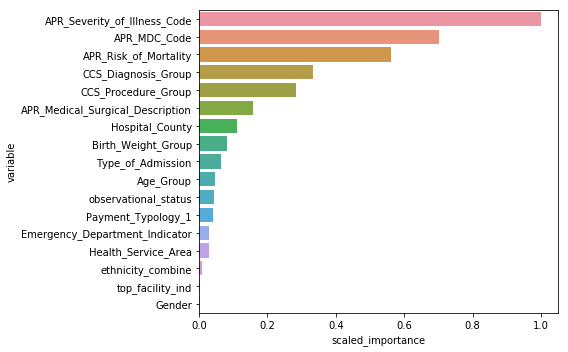

In [69]:
# Feature importance
importance = model.varimp(use_pandas=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='scaled_importance', y='variable', data=importance)
plt.tight_layout()
plt.show()

<a id='3'></a>
*Which feature(s) have more predictive power for the given task? Why?*

Looking at feature importance plot, it looks like clinical factors including risk level features (e.g. severity of illness, risk of mortality) and Diagnostic related (condition and treatment) inputs have more predictive power. Other factors, including gender, facility, and ethnicity, seem to be less important to predict the LOS.

Below, I also created a deep dive of top important features by using partial dependence plots, which show the marginal effect the features have on the predicted outcome of the model. For example, the more severe of the illness, the more importantly cause the impact of predicting the LOS. 

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


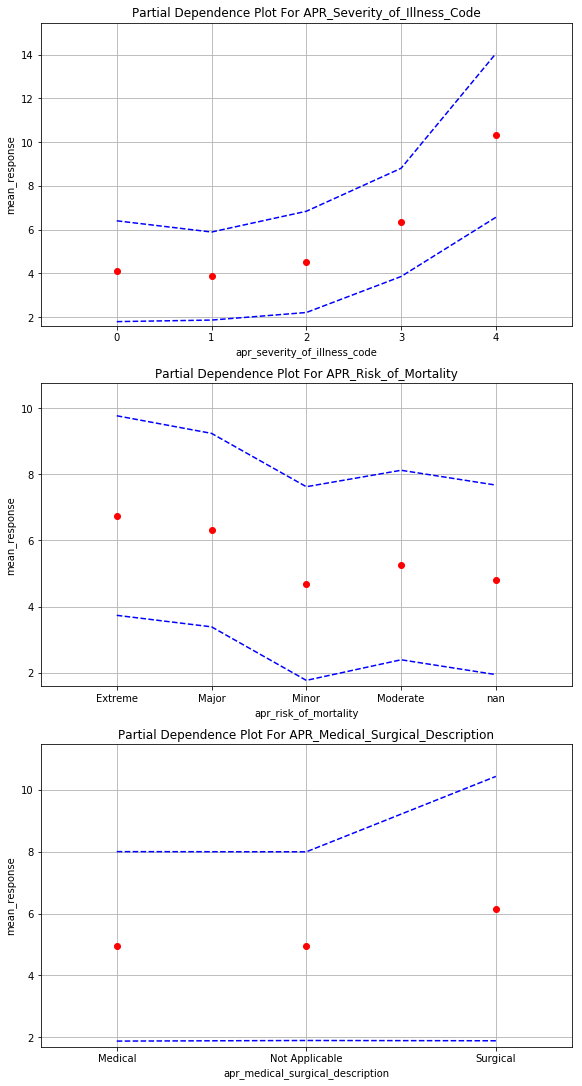

In [70]:
# Deep dive of top important features
_ =model.partial_plot(train, cols=['APR_Severity_of_Illness_Code','APR_Risk_of_Mortality','APR_Medical_Surgical_Description'], figsize=(8, 15))

In [72]:
# Shutdown h2o instance
h2o.cluster().shutdown()

H2O session _sid_8c7e closed.


### Implementation & Next steps

<a id='6'></a>
*If you had more time to work on this, how would you increase your current performance by 10%? Please explain.* 

As a data scientist and thinking of the projects from Phreesia propective, here're some next steps if I have more time: 
   * Infuse Domain knowledge. I would like to know the estimated financial impact of LOS opportunities so that we can use the model to build a business case with strategic recommendations. Also, having clinical experts reviews would also be helpful such as reduce LOS while keeping readmissions stable, best practice on using clinical codes when we continously enhance the features and model. 
   * Get more recent data. We are using 2015's data only currently and in order to beter prediction, it is nesssary to use more recent data. For example, we can also do some cross-time training to ensure stationary. We can also use API so that we can get data with a server API automatically, from recrruing process prospective.
   * Acquire more different types of data . For example, more patient demographic (HHI, education, etc) and detailed medical information so that we can leverage NLP techniques on patients' EHR to get more understanding of the situation of the disease. And patient's past medical information (e.g.comorbidity) and drug data (e.g.what types of medicine this person takes, whether he/she is adherent) are helpful too.
   * Enhance feature engineering. For example, creating interaction features , building hirachcle rule based assignment on some certian features, such as payment typology categories,   when patient have Dual eligibility of medicare and medicaid ,indicating the patients may be low-income group with disabilities. Given that the diagnoses have such a strong feature importance, it would be worth exploring whether other usage of the disease and procedure codes would bring a better prediction model. 
   * Further EDA. For example, I determine LOS out of 95.5% percentile as outlier due to the limited time but I can do some deep dive to see what the outliers could actually be handled or leveraged. If we want to bring the outliers back, we may need to apply some techniques for unbalanced data. (e.g.resampling, assigning weight, ensembles, etc).
   * Explore different algorithms, such as GBM regression tree, ridge and LASSO regression with alpha and lambda parameter tuning. I can also tranform the target variable by using box-cox ,square, log (create a function to train the different options), compare model performance and then the best performing one. 

<a id='7'></a>
*Propose 2 additional questions that might be answered using this dataset. How you would answer these questions? Elaborate.*
   * Question 1: Providers want to identify at-risk patients to reduce readmission rate and then proactively engage patients such as providing care management programs after discharge, coordinating with post-acute care providers and patients’ PCP. In order to early identify which inpatients have higher risk after discharges, we can use the dataset to predict a classification problem (patient disposition). For people who go to skilled nursing facility (SNF) and extended care facility (ECF) beds in the community after the inpatients, we can also communicate to the partnered SNF or ECF facilities.
   * Question 2: If a provider wants to prioritize the most profitable inpatient events due to the resource availability. We can  use the dataset to run a regression model (Total charges - total costs) to project the profit of the next inpatient episode.